In [58]:
# dataset = https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [59]:
data = pd.read_csv('data.csv', sep=';')
data.head()

Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                           122.0            1                      37   
3                           122.0            1                      38   
4                           100.0            1                      37   

   Father's qualification  ...  Curricular units 2nd sem (credited)  \
0                      12  ...                                    0   
1                       3  ...                                    0   
2                      37  ...                                    0   
3                      37  ...                                    0   
4                      38  ...                                    0   

   Curricular units 2nd sem (enrolled)  \
0                                    0   
1                                    6   
2                                    6   
3                                    6   
4                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation rate   GDP    Target  
0             1.4  1.74   Dropout  
1            -0.3  0.79  Graduate  
2             1.4  1.74   Dropout  
3            -0.8 -3.12  Graduate  
4            -0.3  0.79  Graduate  

[5 rows x 37 columns]

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [61]:
data.isna().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [62]:
data.isin([0]).sum()

Marital status                                       0
Application mode                                     0
Application order                                    1
Course                                               0
Daytime/evening attendance\t                       483
Previous qualification                               0
Previous qualification (grade)                       0
Nacionality                                          0
Mother's qualification                               0
Father's qualification                               0
Mother's occupation                                144
Father's occupation                                128
Admission grade                                      0
Displaced                                         1998
Educational special needs                         4373
Debtor                                            3921
Tuition fees up to date                            528
Gender                                            2868
Scholarshi

In [63]:
data.head()

Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                           122.0            1                      37   
3                           122.0            1                      38   
4                           100.0            1                      37   

   Father's qualification  ...  Curricular units 2nd sem (credited)  \
0                      12  ...                                    0   
1                       3  ...                                    0   
2                      37  ...                                    0   
3                      37  ...                                    0   
4                      38  ...                                    0   

   Curricular units 2nd sem (enrolled)  \
0                                    0   
1                                    6   
2                                    6   
3                                    6   
4                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation rate   GDP    Target  
0             1.4  1.74   Dropout  
1            -0.3  0.79  Graduate  
2             1.4  1.74   Dropout  
3            -0.8 -3.12  Graduate  
4            -0.3  0.79  Graduate  

[5 rows x 37 columns]

In [64]:
data.describe().T

count         mean  \
Marital status                                  4424.0     1.178571   
Application mode                                4424.0    18.669078   
Application order                               4424.0     1.727848   
Course                                          4424.0  8856.642631   
Daytime/evening attendance\t                    4424.0     0.890823   
Previous qualification                          4424.0     4.577758   
Previous qualification (grade)                  4424.0   132.613314   
Nacionality                                     4424.0     1.873192   
Mother's qualification                          4424.0    19.561935   
Father's qualification                          4424.0    22.275316   
Mother's occupation                             4424.0    10.960895   
Father's occupation                             4424.0    11.032324   
Admission grade                                 4424.0   126.978119   
Displaced                                       4424.0     0.548373   
Educational special needs                       4424.0     0.011528   
Debtor                                          4424.0     0.113698   
Tuition fees up to date                         4424.0     0.880651   
Gender                                          4424.0     0.351718   
Scholarship holder                              4424.0     0.248418   
Age at enrollment                               4424.0    23.265145   
International                                   4424.0     0.024864   
Curricular units 1st sem (credited)             4424.0     0.709991   
Curricular units 1st sem (enrolled)             4424.0     6.270570   
Curricular units 1st sem (evaluations)          4424.0     8.299051   
Curricular units 1st sem (approved)             4424.0     4.706600   
Curricular units 1st sem (grade)                4424.0    10.640822   
Curricular units 1st sem (without evaluations)  4424.0     0.137658   
Curricular units 2nd sem (credited)             4424.0     0.541817   
Curricular units 2nd sem (enrolled)             4424.0     6.232143   
Curricular units 2nd sem (evaluations)          4424.0     8.063291   
Curricular units 2nd sem (approved)             4424.0     4.435805   
Curricular units 2nd sem (grade)                4424.0    10.230206   
Curricular units 2nd sem (without evaluations)  4424.0     0.150316   
Unemployment rate                               4424.0    11.566139   
Inflation rate                                  4424.0     1.228029   
GDP                                             4424.0     0.001969   

                                                        std    min      25%  \
Marital status                                     0.605747   1.00     1.00   
Application mode                                  17.484682   1.00     1.00   
Application order                                  1.313793   0.00     1.00   
Course                                          2063.566416  33.00  9085.00   
Daytime/evening attendance\t                       0.311897   0.00     1.00   
Previous qualification                            10.216592   1.00     1.00   
Previous qualification (grade)                    13.188332  95.00   125.00   
Nacionality                                        6.914514   1.00     1.00   
Mother's qualification                            15.603186   1.00     2.00   
Father's qualification                            15.343108   1.00     3.00   
Mother's occupation                               26.418253   0.00     4.00   
Father's occupation                               25.263040   0.00     4.00   
Admission grade                                   14.482001  95.00   117.90   
Displaced                                          0.497711   0.00     0.00   
Educational special needs                          0.106760   0.00     0.00   
Debtor                                             0.317480   0.00     0.00   
Tuition fees up to date                            0.324235   0.00     1.00   

In [65]:
# check the value counts for all the classes in a feature having distinct classes less than 10
for feature in data.columns:
    if data[feature].nunique() < 10:
        print(data[feature].value_counts())
        print('-' * 60)

Marital status
1    3919
2     379
4      91
5      25
6       6
3       4
Name: count, dtype: int64
------------------------------------------------------------
Application order
1    3026
2     547
3     309
4     249
5     154
6     137
9       1
0       1
Name: count, dtype: int64
------------------------------------------------------------
Daytime/evening attendance\t
1    3941
0     483
Name: count, dtype: int64
------------------------------------------------------------
Displaced
1    2426
0    1998
Name: count, dtype: int64
------------------------------------------------------------
Educational special needs
0    4373
1      51
Name: count, dtype: int64
------------------------------------------------------------
Debtor
0    3921
1     503
Name: count, dtype: int64
------------------------------------------------------------
Tuition fees up to date
1    3896
0     528
Name: count, dtype: int64
------------------------------------------------------------
Gender
0    2868
1    

# Exploratory Daya Analysis

In [66]:
# importing the necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [67]:
x = data.drop('Target', axis=1)
y = data['Target']

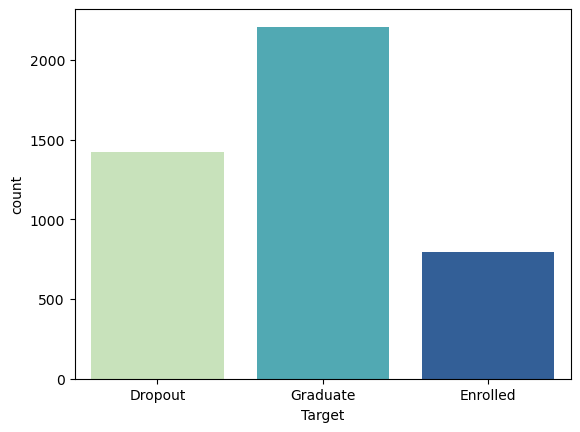

In [68]:
sns.countplot(x=y,data=data, palette='YlGnBu')
plt.savefig('targetvariablecount.png', bbox_inches='tight')
plt.show();

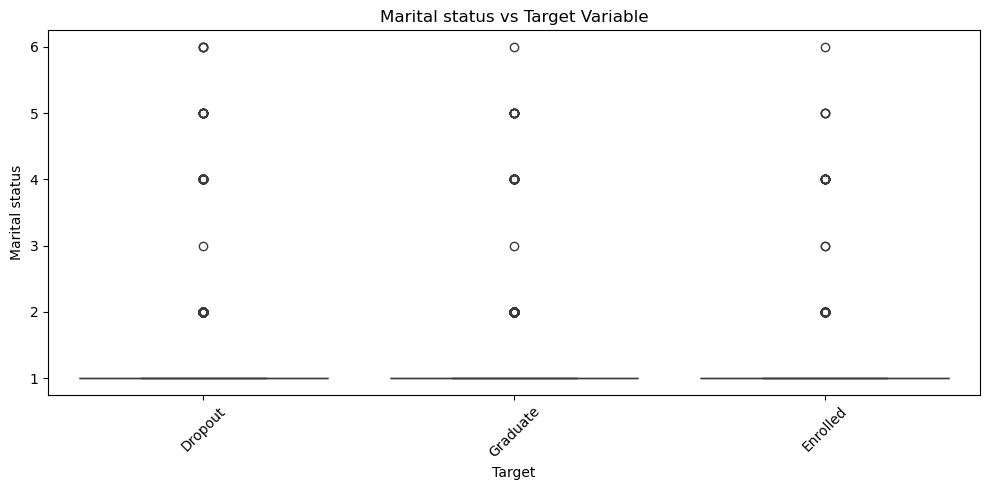

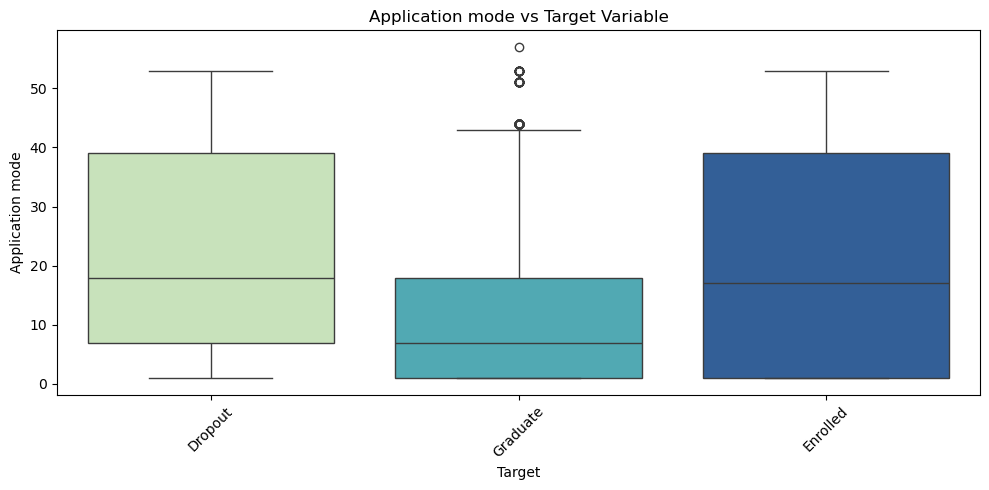

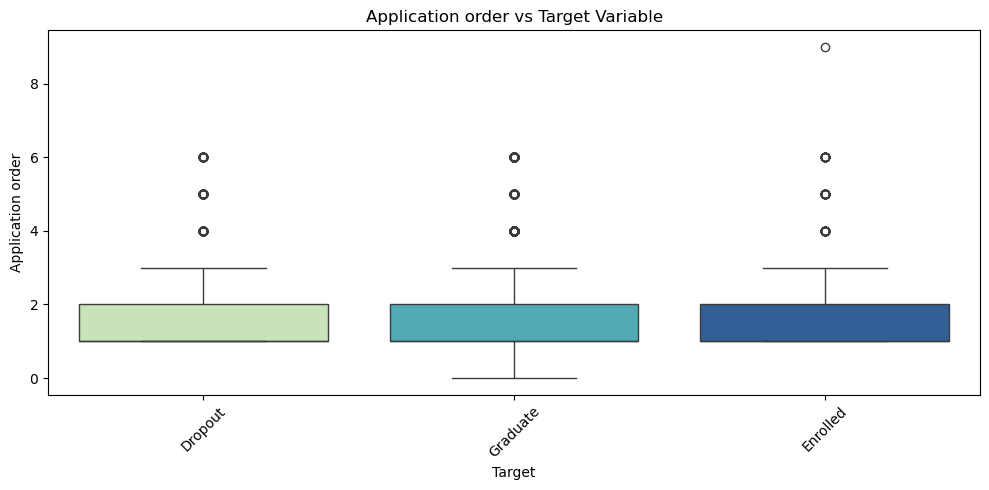

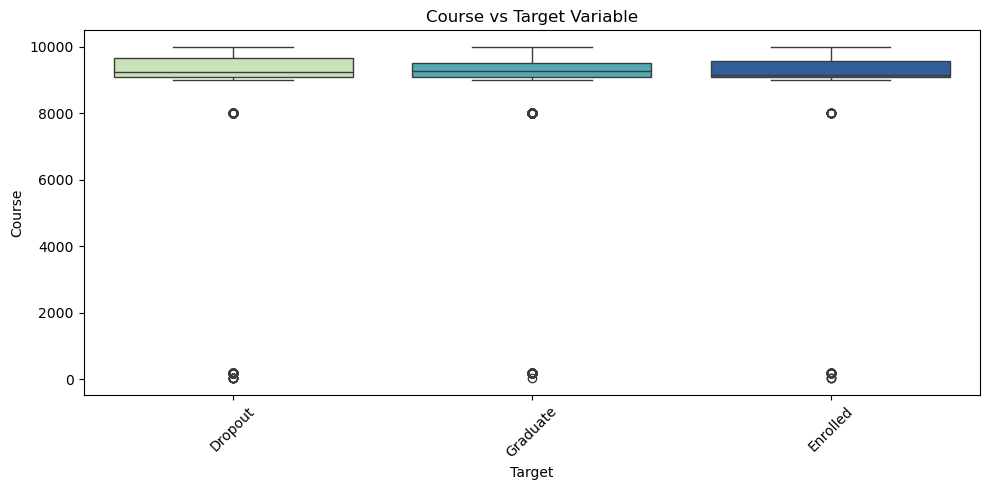

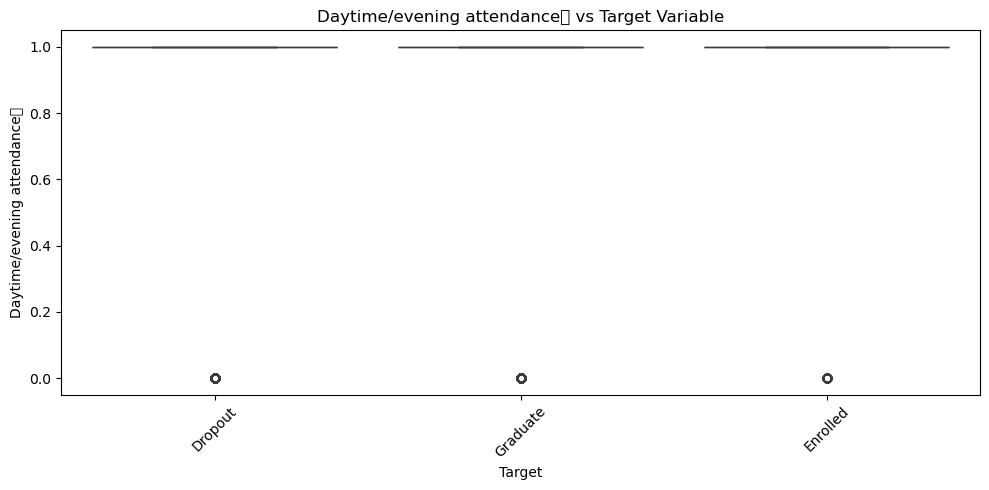

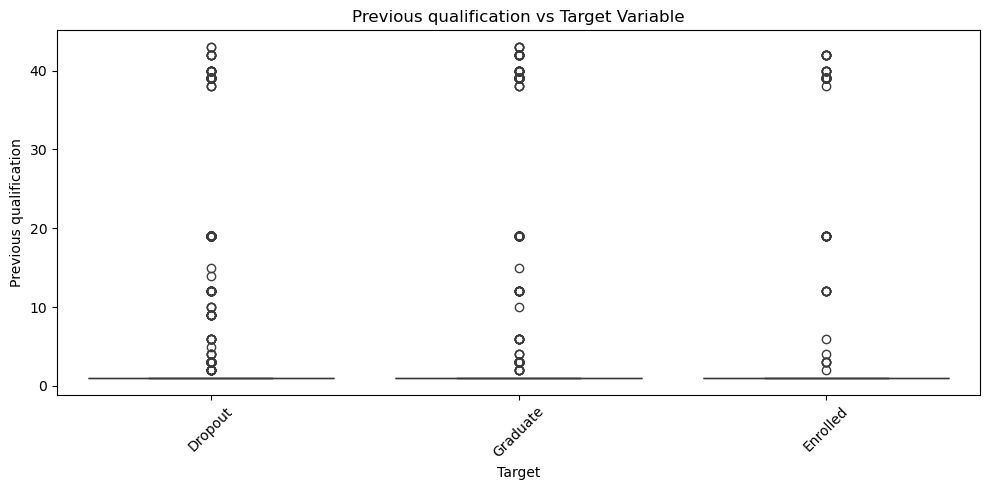

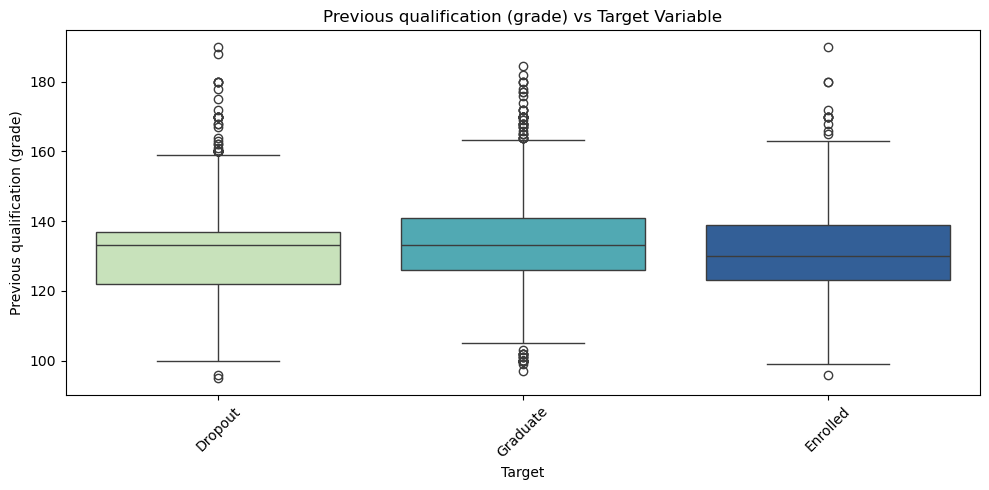

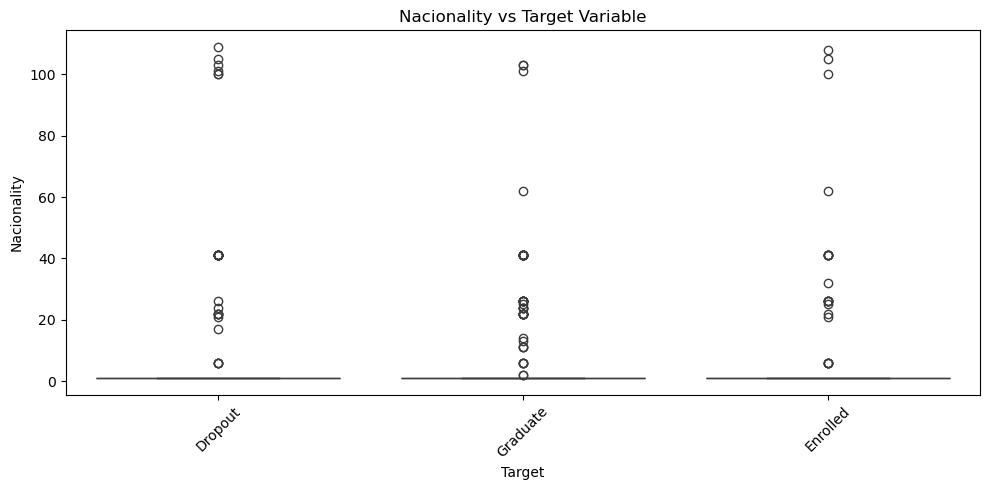

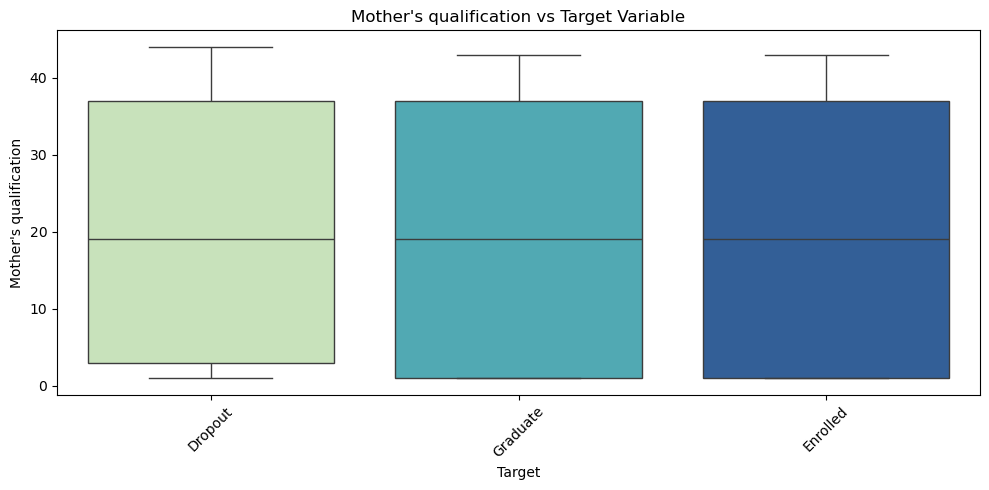

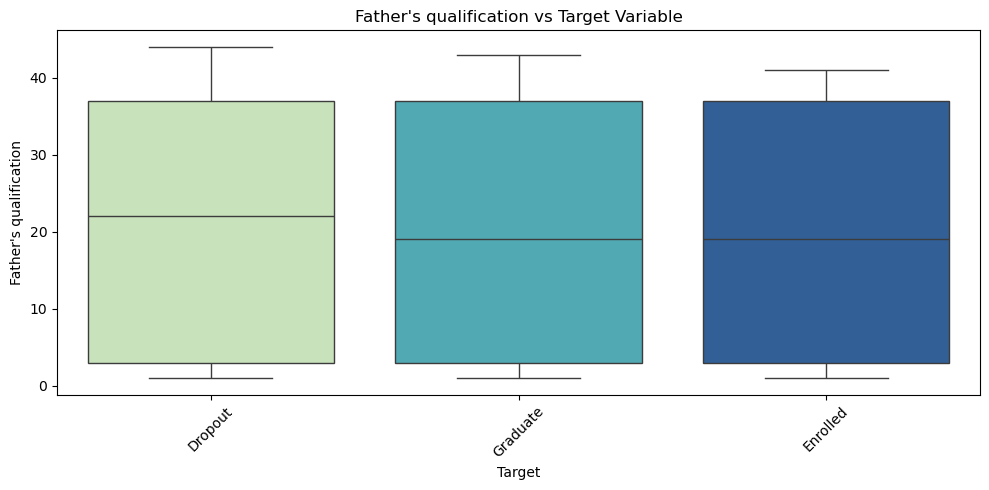

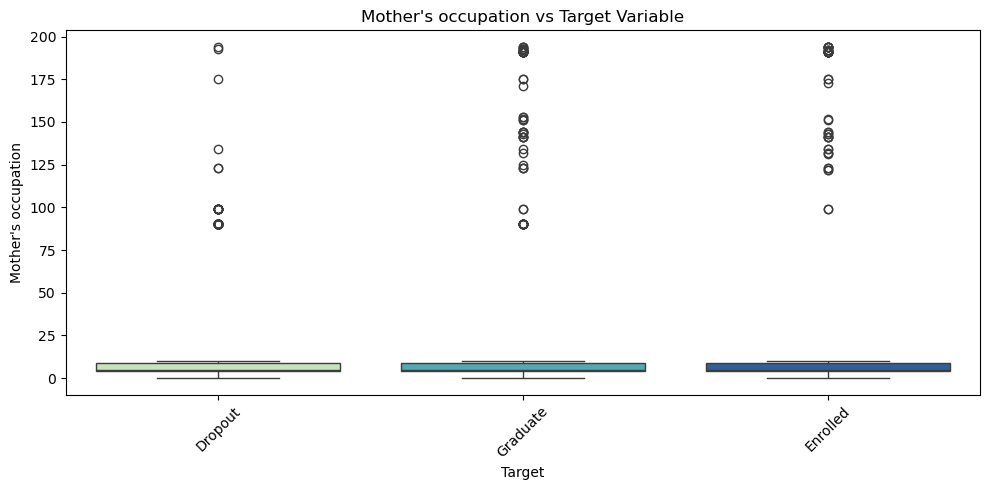

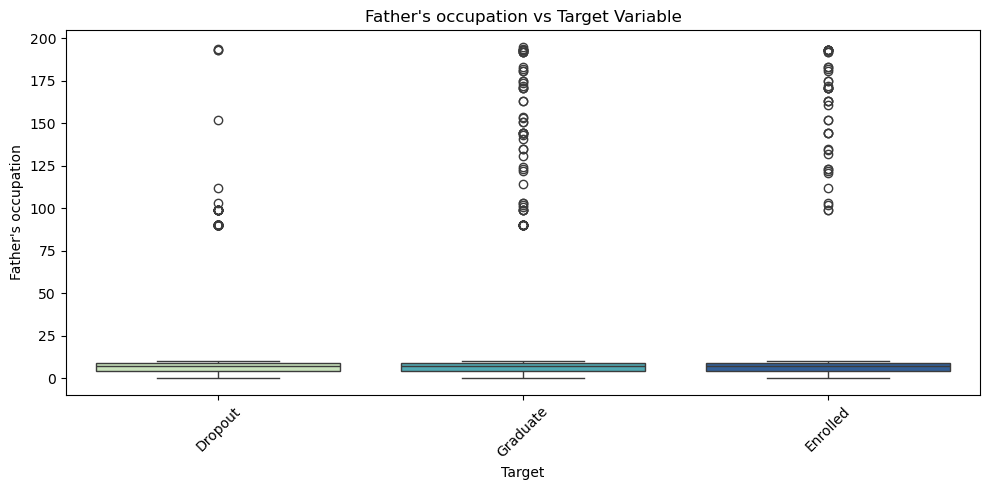

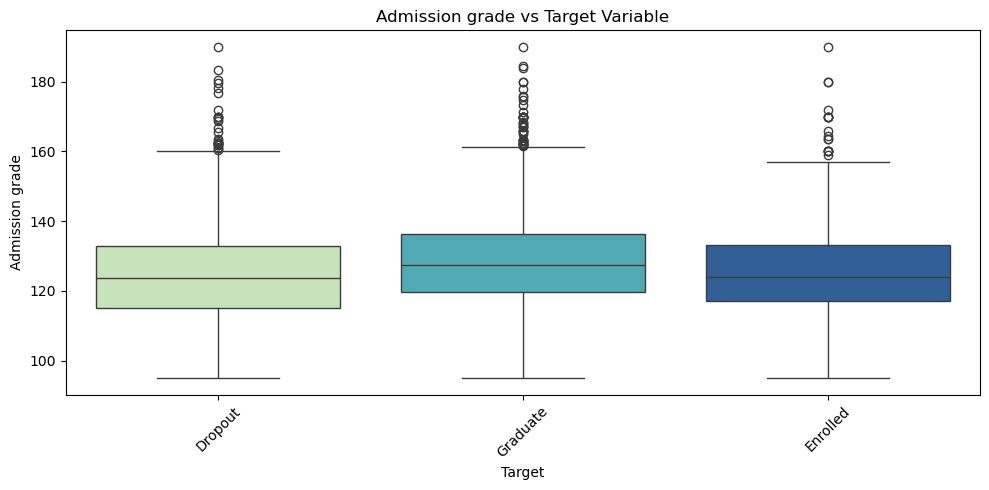

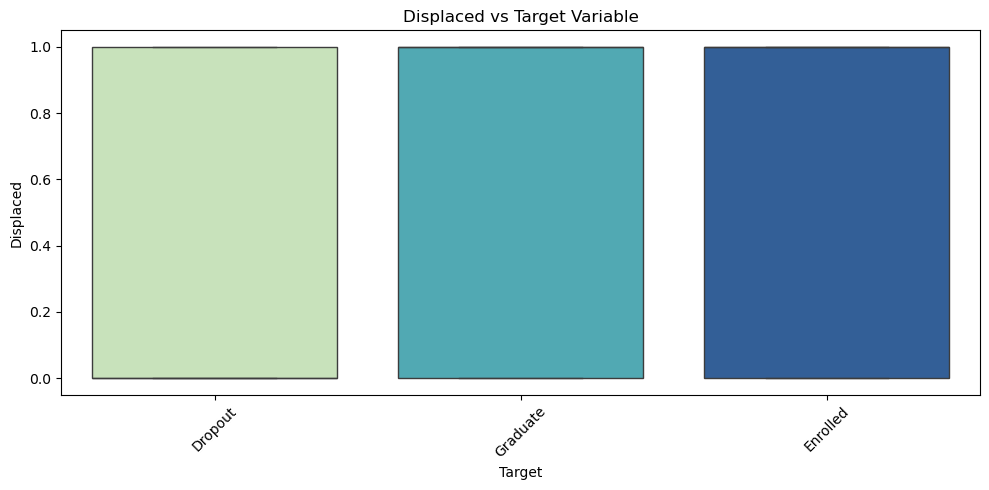

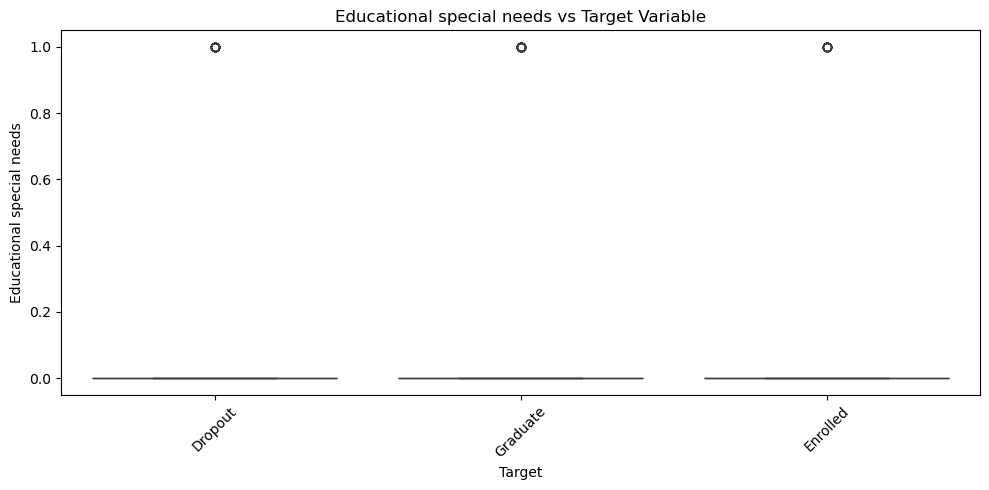

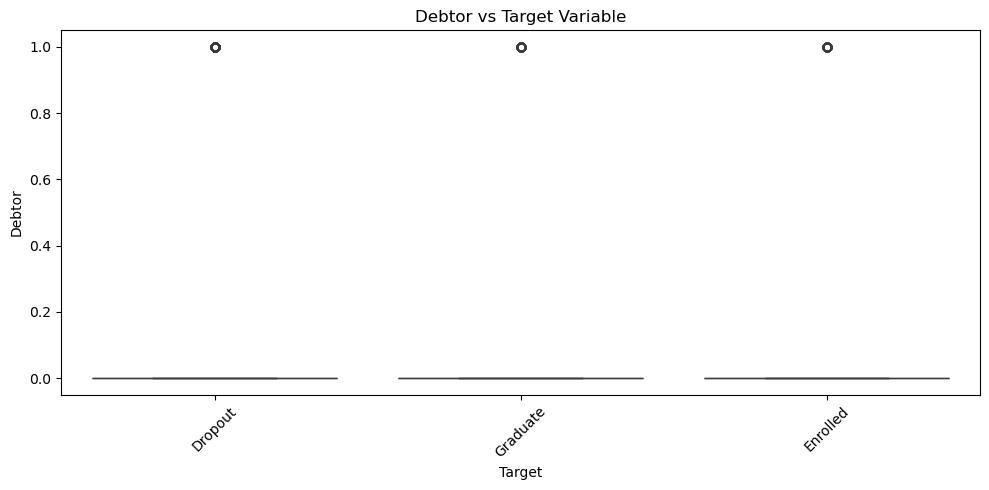

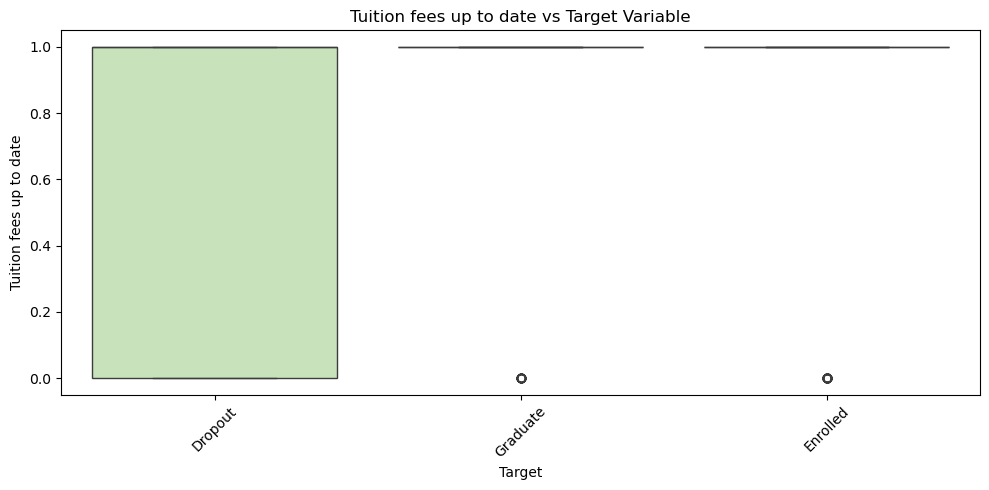

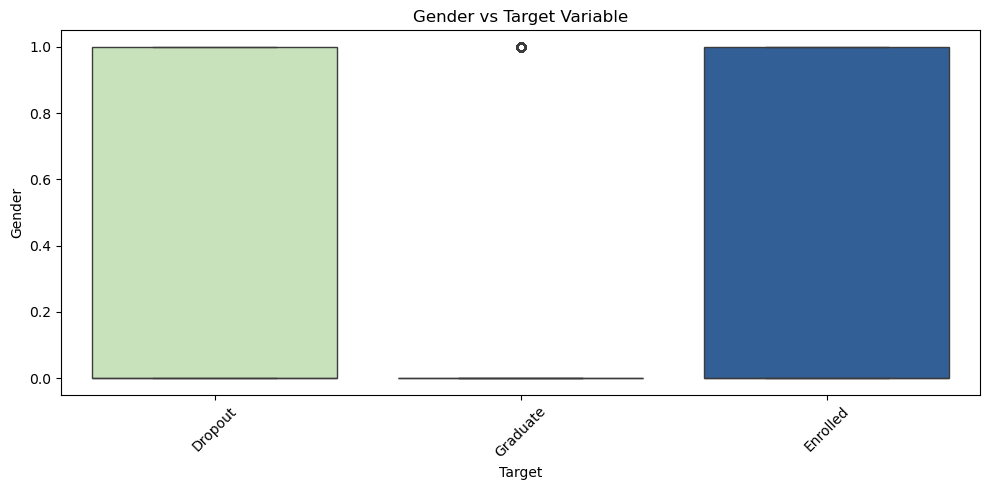

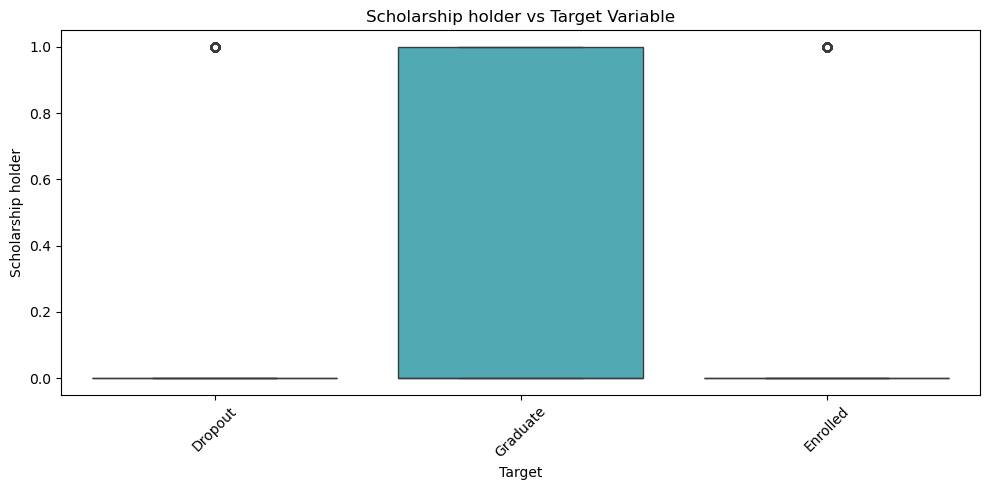

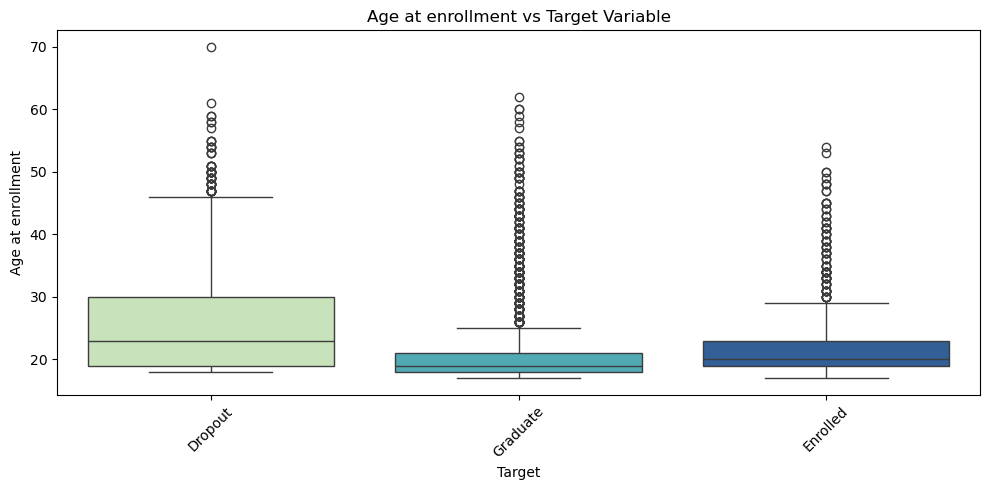

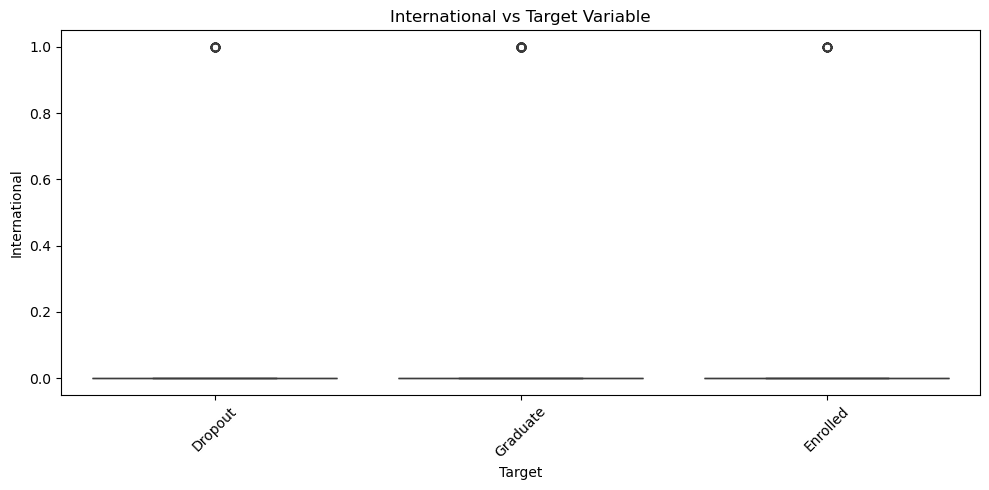

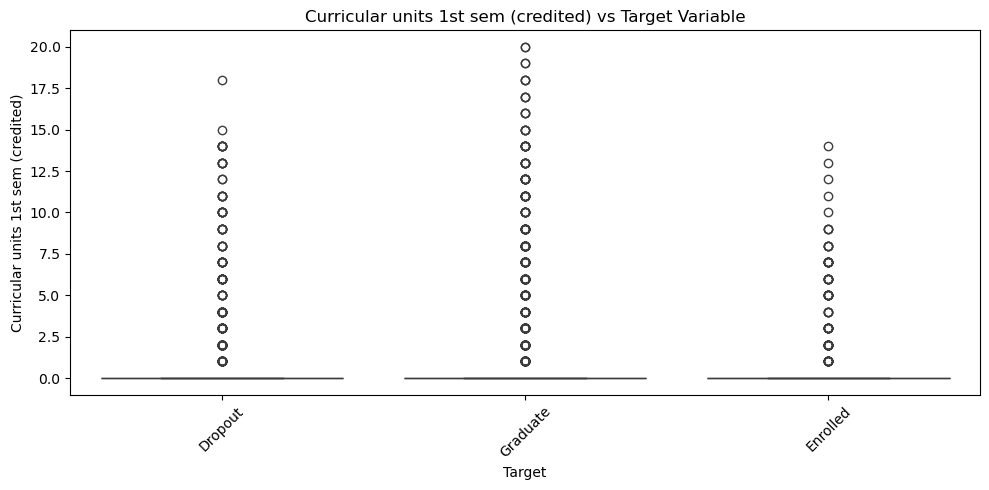

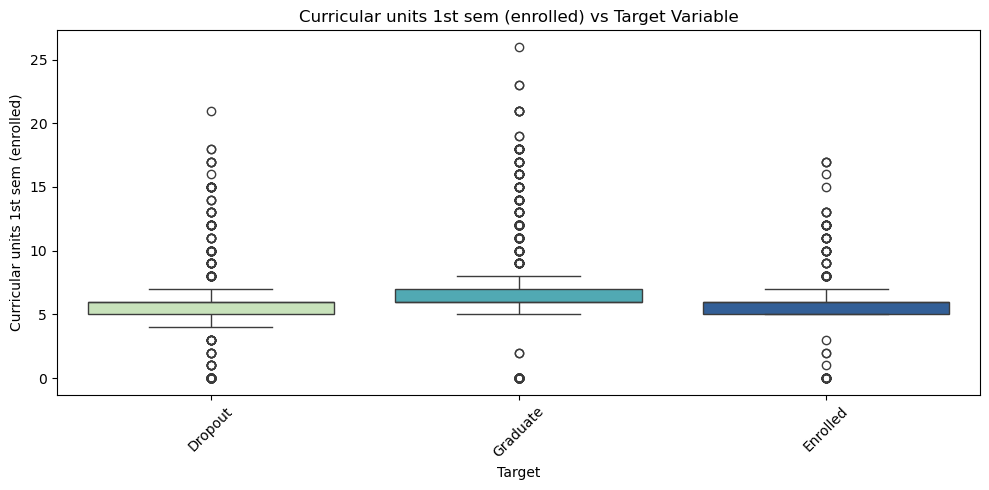

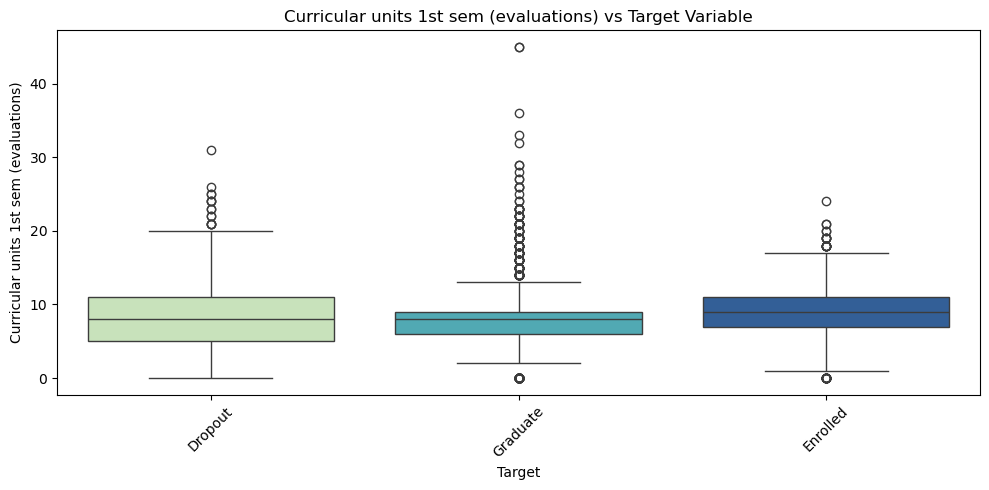

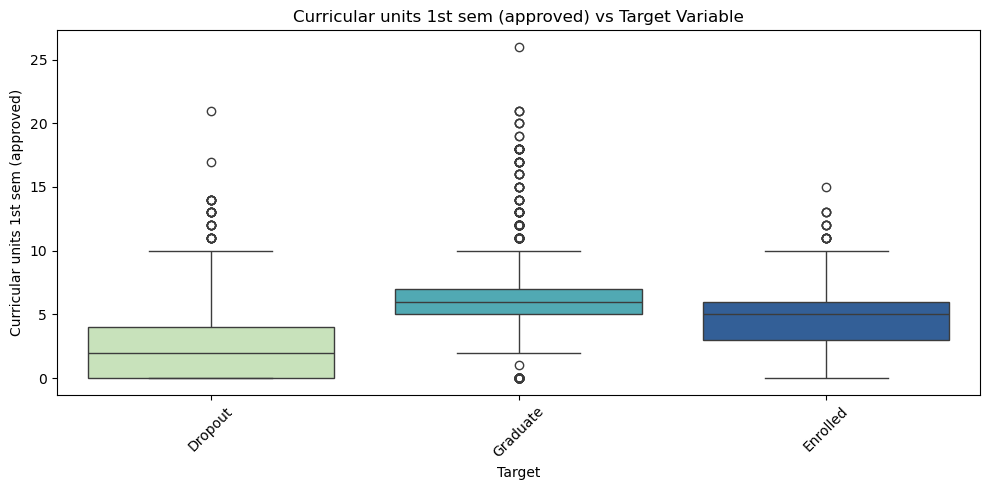

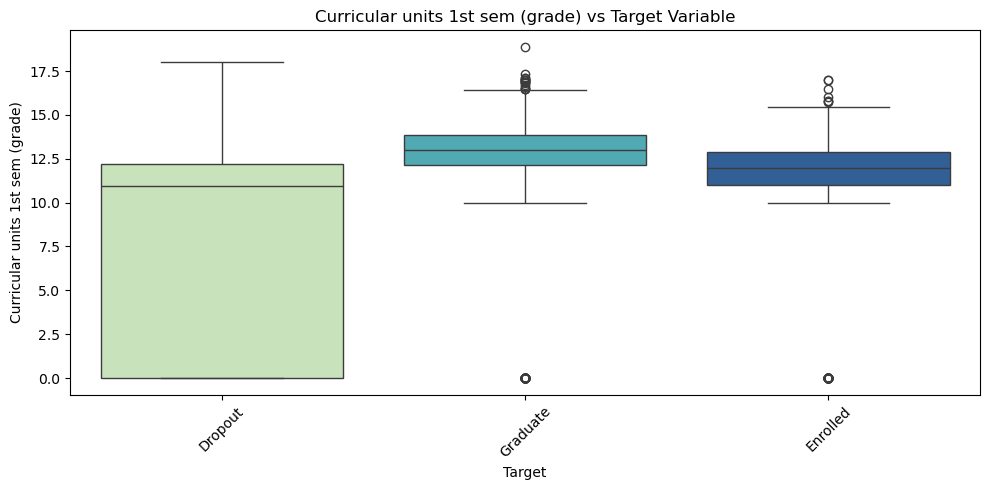

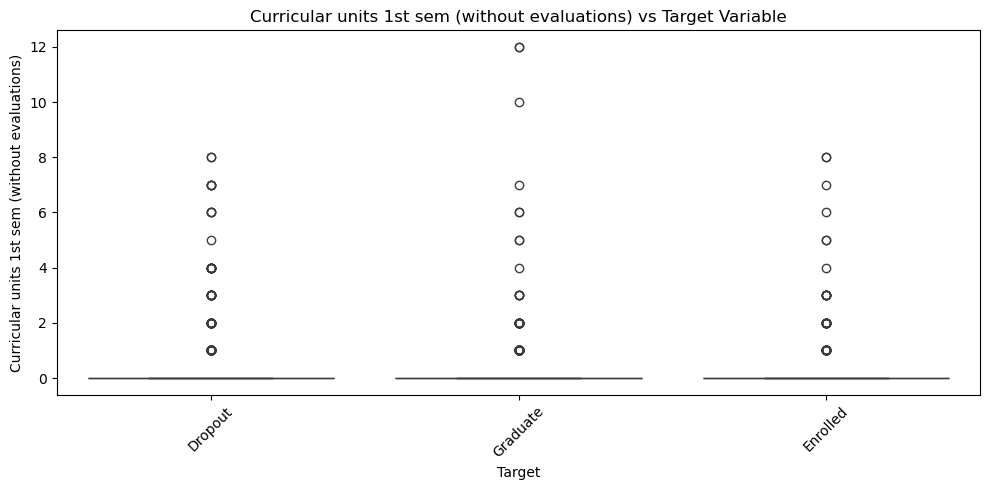

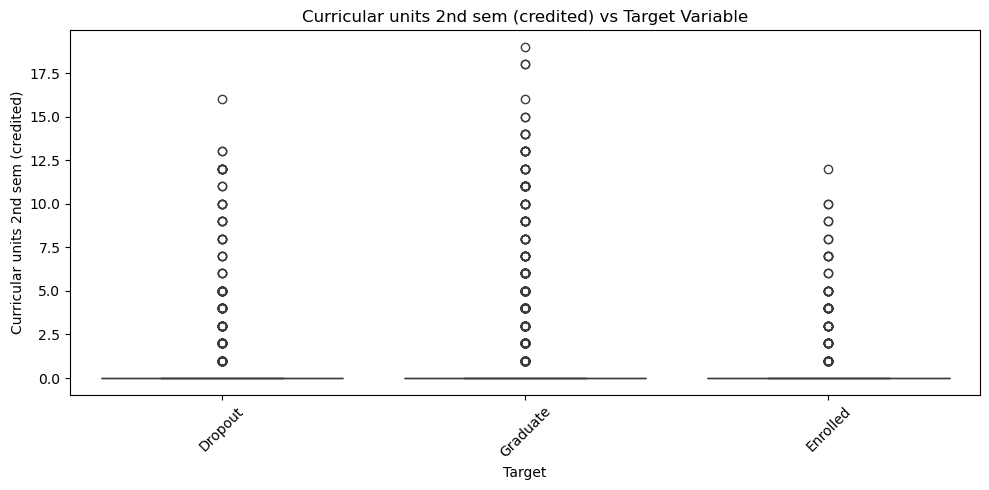

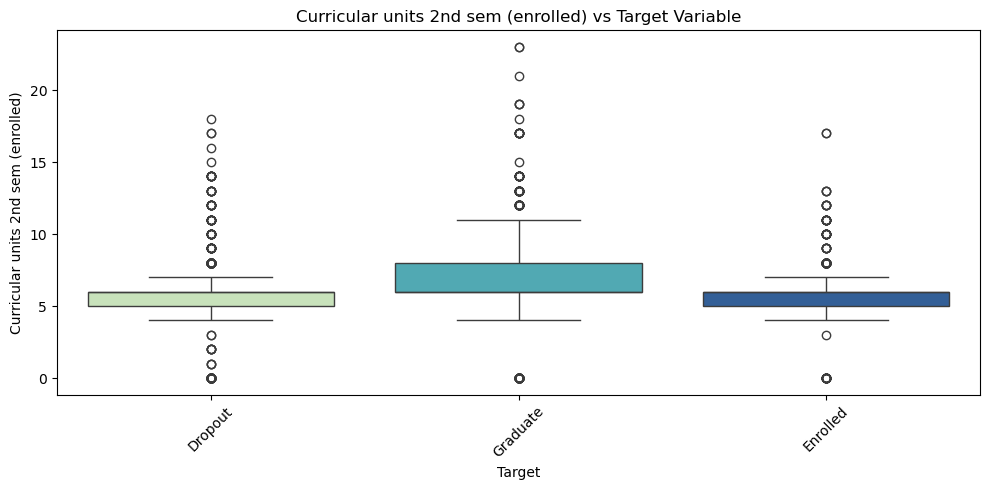

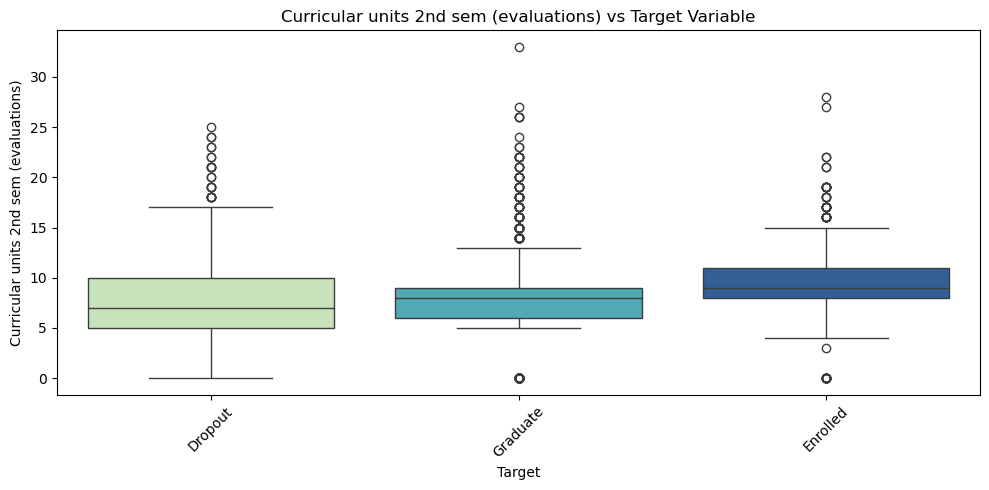

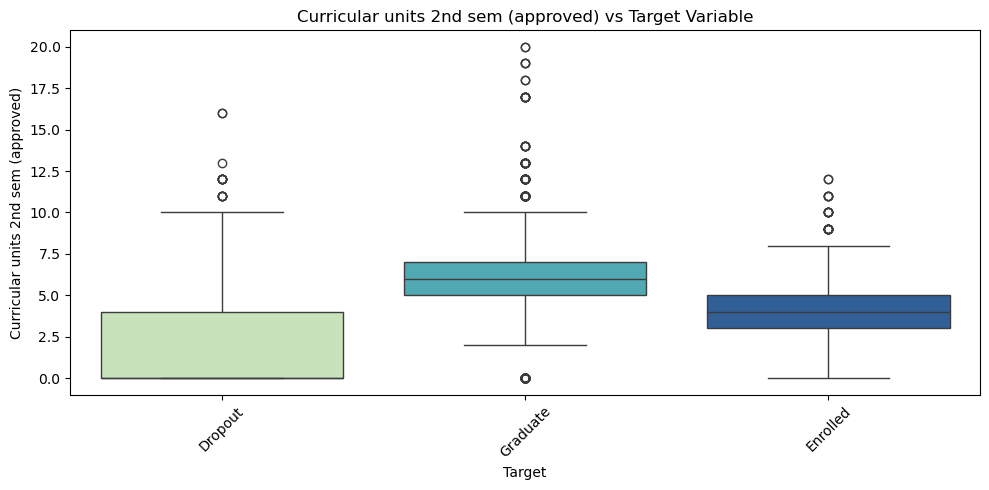

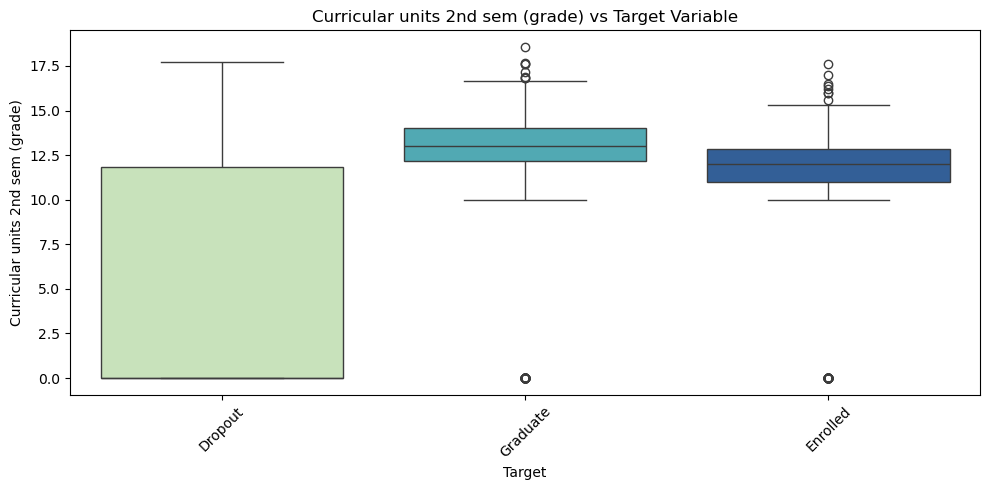

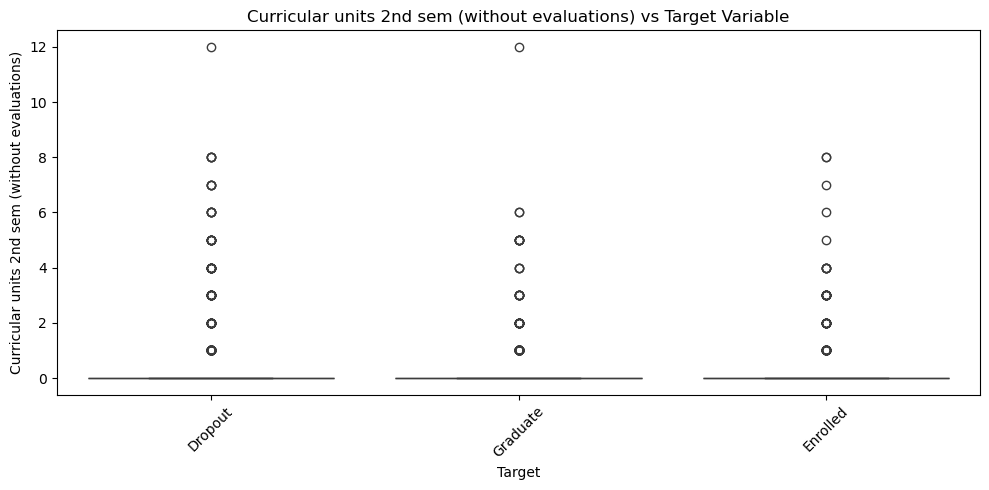

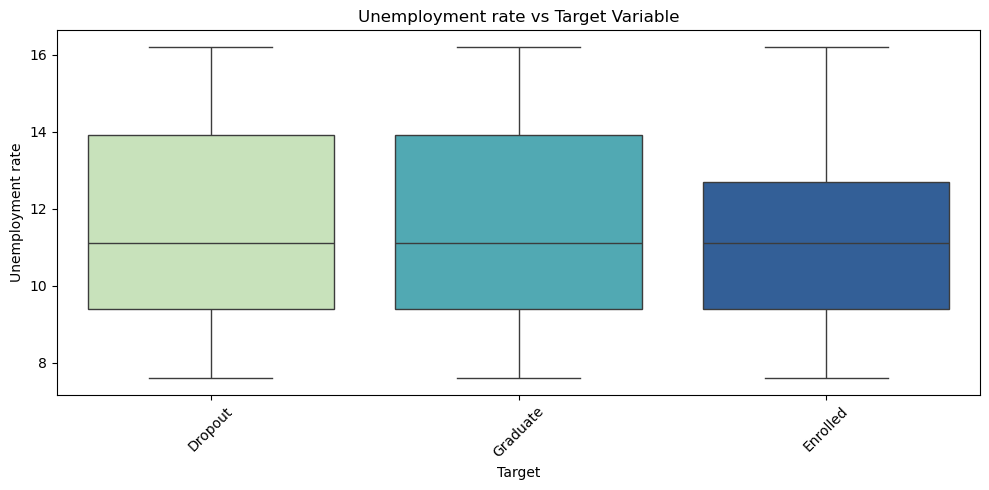

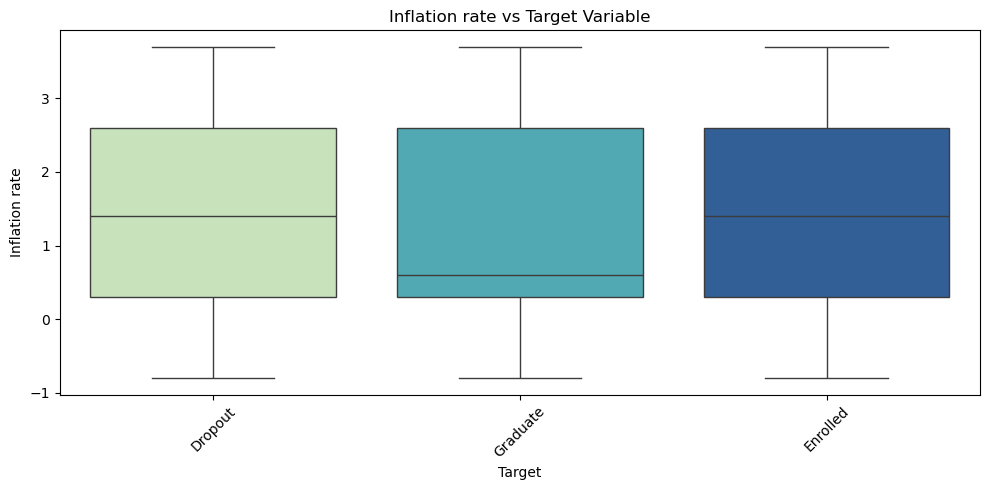

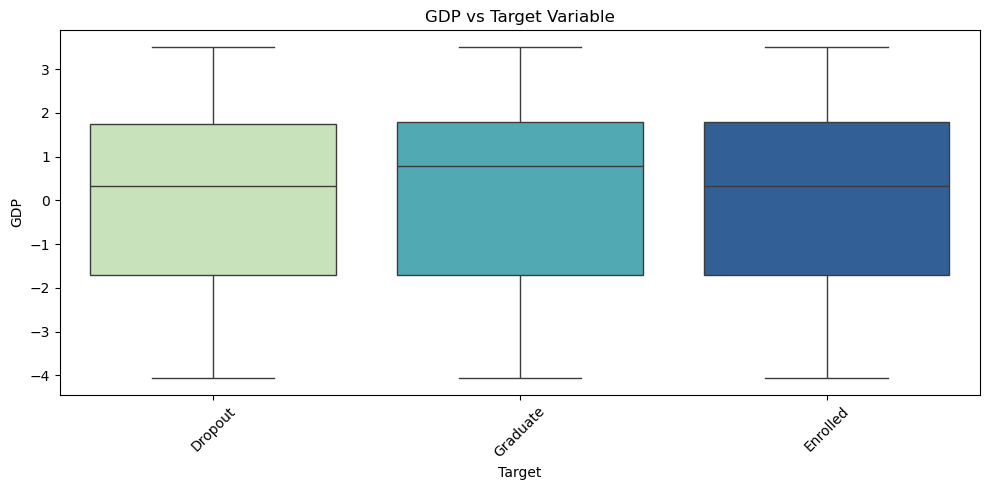

In [69]:
for feature in x:
    plt.figure(figsize=(10,5))
    sns.boxplot(x=y, y=feature, data=data, palette='YlGnBu')
    plt.title(f'{feature} vs Target Variable')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show();

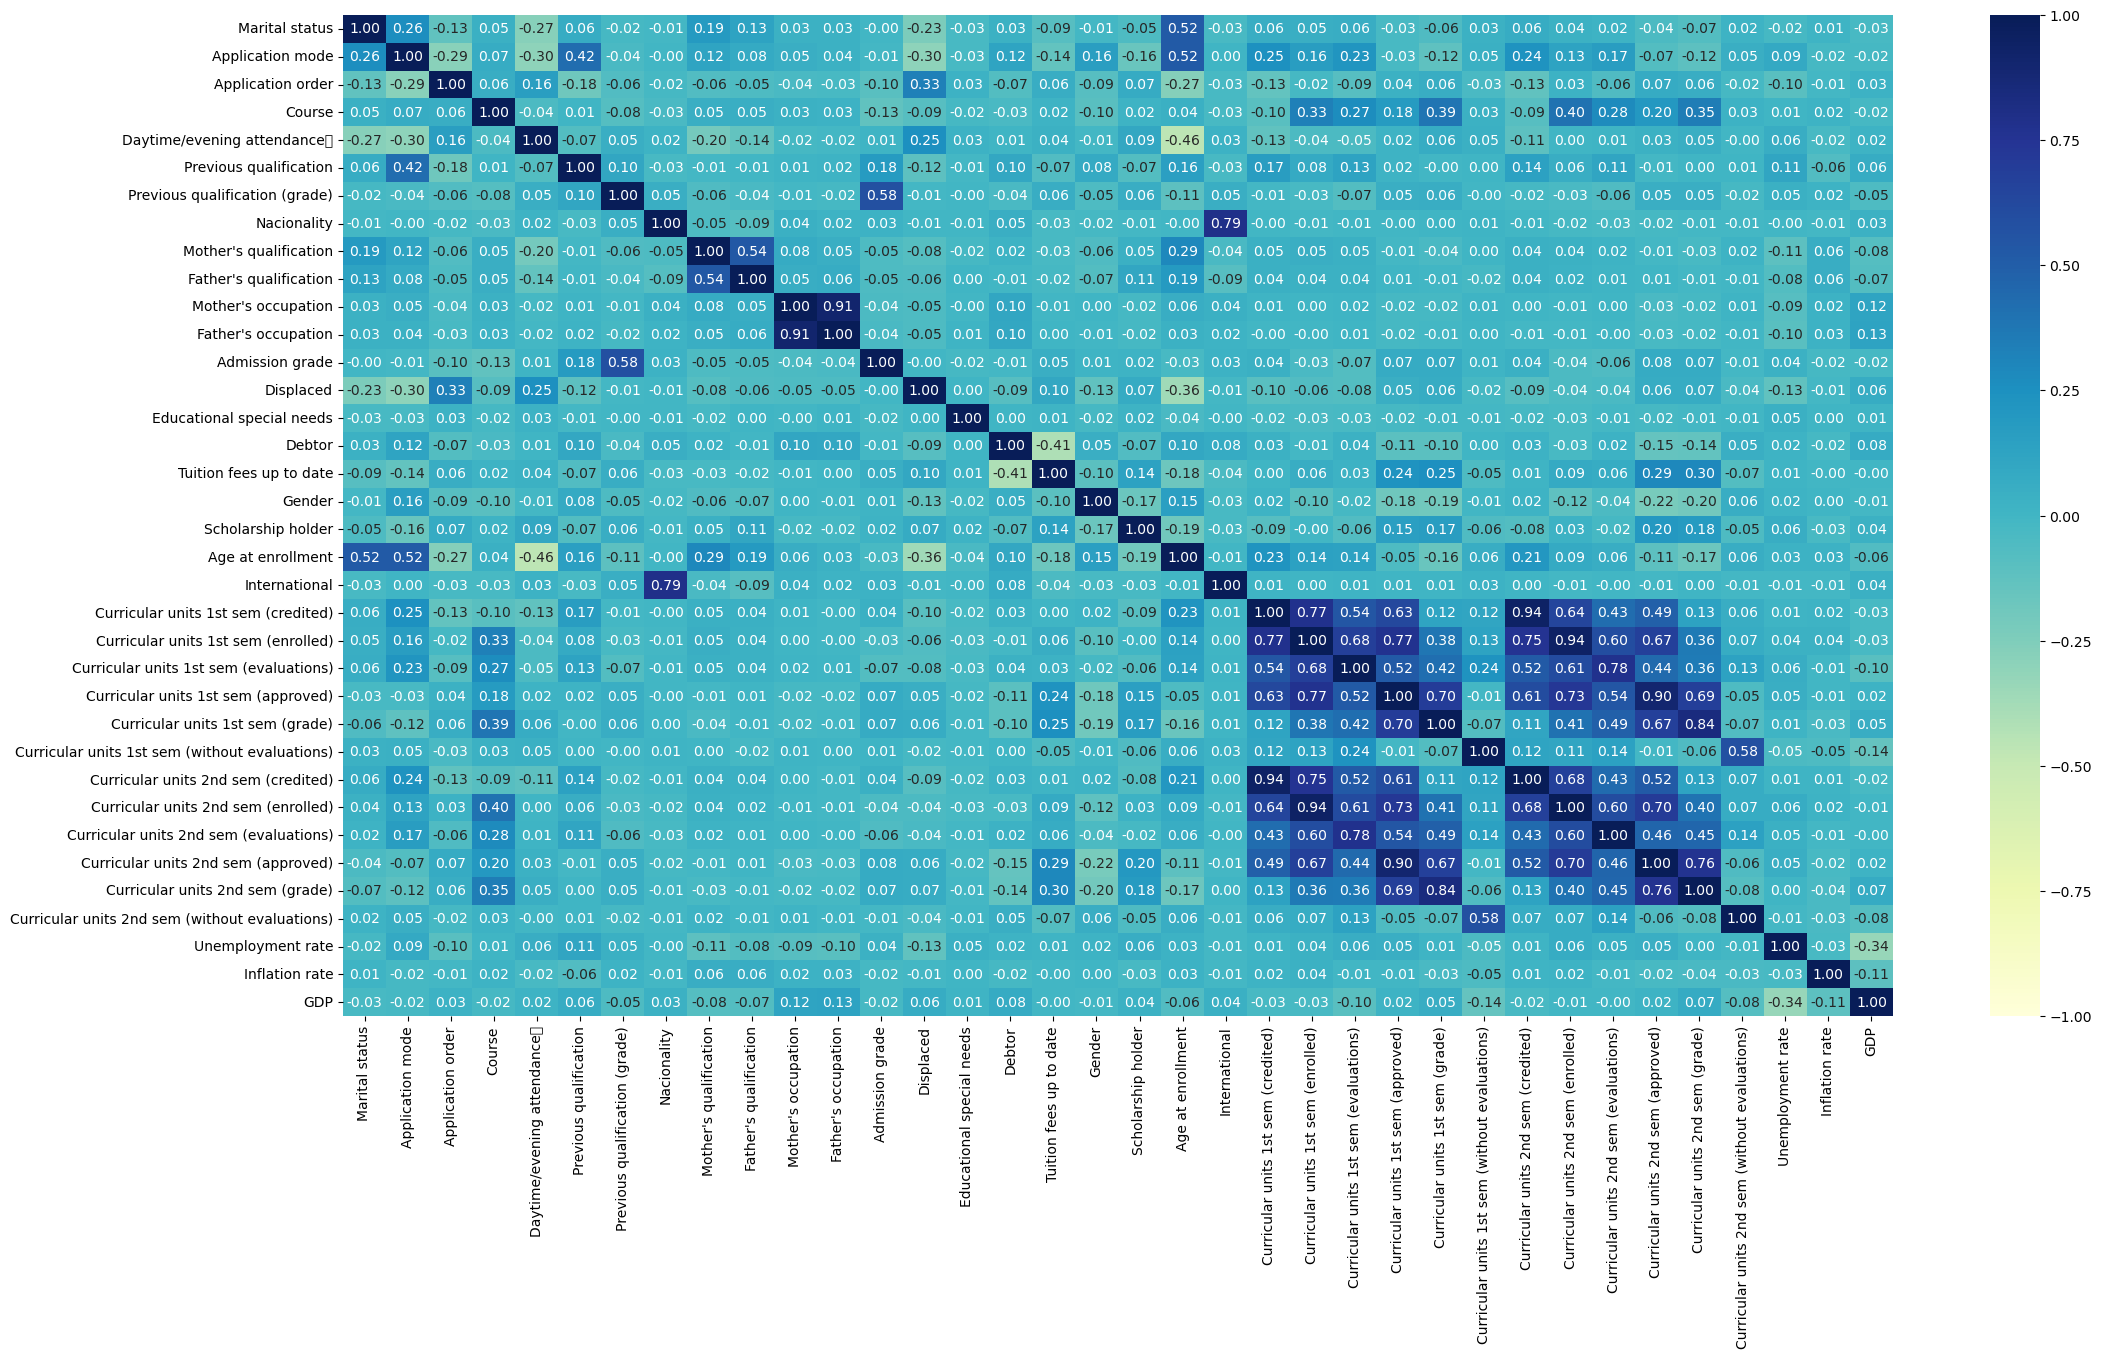

In [70]:
plt.figure(figsize=(25,13))
sns.heatmap(x.corr(), vmin=-1,vmax=1, annot=True, cmap='YlGnBu', fmt='.2f')
plt.savefig('heatmap.png',bbox_inches='tight')
plt.show();

In [71]:
# feature engineering
# train test split
# feature selection
# model building
# LR, SVM, NB, KNN, DT, RF, XGB, LGBM
# compare the performances
# perform prediction on the test data

# Feature Engineering

In [73]:
x.head()

Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                           122.0            1                      37   
3                           122.0            1                      38   
4                           100.0            1                      37   

   Father's qualification  ...  \
0                      12  ...   
1                       3  ...   
2                      37  ...   
3                      37  ...   
4                      38  ...   

   Curricular units 1st sem (without evaluations)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                                    0                                    0   
1                                    0                                    6   
2                                    0                                    6   
3                                    0                                    6   
4                                    0                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation rate   GDP  
0             1.4  1.74  
1            -0.3  0.79  
2             1.4  1.74  
3            -0.8 -3.12  
4            -0.3  0.79  

[5 rows x 36 columns]

In [76]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x = pd.DataFrame(x_scaled, columns=x.columns, index=x.index)

In [78]:
x.head()

Marital status  Application mode  Application order    Course  \
0       -0.294829         -0.095470           2.490896 -4.209520   
1       -0.294829         -0.209869          -0.554068  0.192580   
2       -0.294829         -1.010660           2.490896  0.103404   
3       -0.294829         -0.095470           0.207173  0.444115   
4        1.356212          1.162916          -0.554068 -0.408389   

   Daytime/evening attendance\t  Previous qualification  \
0                      0.350082                -0.35023   
1                      0.350082                -0.35023   
2                      0.350082                -0.35023   
3                      0.350082                -0.35023   
4                     -2.856470                -0.35023   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                       -0.804841    -0.126298               -0.036018   
1                        2.076819    -0.126298               -1.189759   
2                       -0.804841    -0.126298                1.117723   
3                       -0.804841    -0.126298                1.181819   
4                       -2.473171    -0.126298                1.117723   

   Father's qualification  ...  \
0               -0.669778  ...   
1               -1.256427  ...   
2                0.959802  ...   
3                0.959802  ...   
4                1.024985  ...   

   Curricular units 1st sem (without evaluations)  \
0                                       -0.199273   
1                                       -0.199273   
2                                       -0.199273   
3                                       -0.199273   
4                                       -0.199273   

   Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                            -0.282442                            -2.838337   
1                            -0.282442                            -0.105726   
2                            -0.282442                            -0.105726   
3                            -0.282442                            -0.105726   
4                            -0.282442                            -0.105726   

   Curricular units 2nd sem (evaluations)  \
0                               -2.042630   
1                               -0.522682   
2                               -2.042630   
3                                0.490616   
4                               -0.522682   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                            -1.471527                         -1.963489   
1                             0.518904                          0.659562   
2                            -1.471527                         -1.963489   
3                             0.187165                          0.416450   
4                             0.518904                          0.531608   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                       -0.199441          -0.287638   
1                                       -0.199441           0.876222   
2                                       -0.199441          -0.287638   
3                                       -0.199441          -0.813253   
4                                       -0.199441           0.876222   

   Inflation rate       GDP  
0        0.124386  0.765761  
1       -1.105222  0.347199  
2        0.124386  0.765761  
3       -1.466871 -1.375511  
4       -1.105222  0.347199  

[5 rows x 36 columns]

# Splitting the data into train and test sets

In [79]:
y.value_counts()

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

In [80]:
from sklearn.model_selection import train_test_split
y = y.map({'Dropout':0,'Enrolled':1,'Graduate':2})
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=1, stratify=y)

In [81]:
x_train.shape

(3539, 36)

In [82]:
x_test.shape

(885, 36)

# Feature Selection 

In [83]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
selection_model = SelectFromModel(Lasso(alpha=0.005, random_state=1))
selection_model.fit_transform(x_train,y_train)

array([[-1.01066035, -0.55406775,  0.12715221, ..., -1.13978845,
         3.78098132, -1.48904287],
       [ 1.16291621, -0.55406775,  0.54976936, ..., -0.4763116 ,
        -0.19944099, -0.81325289],
       [-0.03827083,  0.20717316,  0.48288729, ...,  0.51890369,
        -0.19944099, -0.28763846],
       ...,
       [-1.01066035,  3.2521368 ,  0.14072248, ..., -0.80805002,
        -0.19944099, -1.48904287],
       [-0.09547022,  0.20717316,  0.33894544, ...,  1.18238055,
        -0.19944099,  1.47692427],
       [-0.66746405, -0.55406775,  0.11067402, ..., -0.4763116 ,
         2.45417388,  1.47692427]])

In [84]:
selected_features = x_train.columns[(selection_model.get_support())] # filtering the features to select only the important ones

In [85]:
print(x_train.shape[1])

36


In [86]:
len(selected_features)

27

In [87]:
print(np.sum(selection_model.estimator_.coef_ == 0))

9


In [88]:
selected_features

Index(['Application mode', 'Application order', 'Course',
       'Previous qualification', 'Nacionality', 'Father's qualification',
       'Mother's occupation', 'Admission grade', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (without evaluations)', 'Unemployment rate'],
      dtype='object')

In [89]:
x_train = x_train[selected_features] # applying the feature selection to our x_train 

In [90]:
x_train

Application mode  Application order    Course  Previous qualification  \
3517         -1.010660          -0.554068  0.127152               -0.350230   
2327          1.162916          -0.554068  0.549769               -0.350230   
4402         -0.038271           0.207173  0.482887               -0.350230   
1023         -0.095470          -0.554068  0.103404               -0.350230   
2720         -1.010660           0.207173  0.110674               -0.350230   
...                ...                ...       ...                     ...   
2882          1.162916          -0.554068  0.549769               -0.350230   
3558         -1.010660           1.729655  0.103404               -0.350230   
641          -1.010660           3.252137  0.140722               -0.350230   
3280         -0.095470           0.207173  0.338945               -0.350230   
3462         -0.667464          -0.554068  0.110674               -0.154448   

      Nacionality  Father's qualification  Mother's occupation  \
3517    -0.126298                1.024985            -0.074233   
2327    -0.126298                0.959802            -0.377089   
4402    -0.126298               -0.213496            -0.301375   
1023    -0.126298                1.024985            -0.074233   
2720    -0.126298                1.024985            -0.074233   
...           ...                     ...                  ...   
2882    -0.126298                0.959802            -0.074233   
3558    -0.126298               -0.213496            -0.339232   
641     -0.126298                0.959802            -0.074233   
3280     5.659289               -1.386793            -0.149947   
3462    -0.126298                0.959802            -0.149947   

      Admission grade  Displaced  Educational special needs  ...  \
3517        -0.364502   0.907512                  -0.107993  ...   
2327        -0.481902   0.907512                  -0.107993  ...   
4402        -0.012301   0.907512                  -0.107993  ...   
1023        -0.226384  -1.101914                  -0.107993  ...   
2720         0.132723   0.907512                  -0.107993  ...   
...               ...        ...                        ...  ...   
2882        -0.937692  -1.101914                  -0.107993  ...   
3558        -0.136607   0.907512                  -0.107993  ...   
641         -0.723609  -1.101914                  -0.107993  ...   
3280        -0.178042   0.907512                  -0.107993  ...   
3462        -0.481902  -1.101914                  -0.107993  ...   

      Curricular units 1st sem (evaluations)  \
3517                                0.407059   
2327                                0.407059   
4402                               -0.310879   
1023                               -0.550192   
2720                               -0.310879   
...                                      ...   
2882                                1.364310   
3558                               -0.310879   
641                                 0.167746   
3280                               -0.071567   
3462                                2.800186   

      Curricular units 1st sem (approved)  Curricular units 1st sem (grade)  \
3517                            -1.521257                         -2.197102   
2327                            -0.874822                         -0.029077   
4402                             0.094832                          0.404529   
1023                             0.418050                          0.796838   
2720                             0.418050                          0.659185   
...                                   ...                               ...   
2882                            -1.198040                         -0.132316   
3558                             0.418050                          0.418294   
641                             -0.551604                          0.211815   
3280                             0.741268                          0.431076   
3

In [91]:
x_train = x_train.reset_index(drop=True)

In [92]:
x_train.head()

Application mode  Application order    Course  Previous qualification  \
0         -1.010660          -0.554068  0.127152                -0.35023   
1          1.162916          -0.554068  0.549769                -0.35023   
2         -0.038271           0.207173  0.482887                -0.35023   
3         -0.095470          -0.554068  0.103404                -0.35023   
4         -1.010660           0.207173  0.110674                -0.35023   

   Nacionality  Father's qualification  Mother's occupation  Admission grade  \
0    -0.126298                1.024985            -0.074233        -0.364502   
1    -0.126298                0.959802            -0.377089        -0.481902   
2    -0.126298               -0.213496            -0.301375        -0.012301   
3    -0.126298                1.024985            -0.074233        -0.226384   
4    -0.126298                1.024985            -0.074233         0.132723   

   Displaced  Educational special needs  ...  \
0   0.907512                  -0.107993  ...   
1   0.907512                  -0.107993  ...   
2   0.907512                  -0.107993  ...   
3  -1.101914                  -0.107993  ...   
4   0.907512                  -0.107993  ...   

   Curricular units 1st sem (evaluations)  \
0                                0.407059   
1                                0.407059   
2                               -0.310879   
3                               -0.550192   
4                               -0.310879   

   Curricular units 1st sem (approved)  Curricular units 1st sem (grade)  \
0                            -1.521257                         -2.197102   
1                            -0.874822                         -0.029077   
2                             0.094832                          0.404529   
3                             0.418050                          0.796838   
4                             0.418050                          0.659185   

   Curricular units 1st sem (without evaluations)  \
0                                       -0.199273   
1                                       -0.199273   
2                                       -0.199273   
3                                       -0.199273   
4                                       -0.199273   

   Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                            -0.282442                            -0.561161   
1                            -0.282442                            -0.561161   
2                            -0.282442                            -0.105726   
3                            -0.282442                            -0.105726   
4                            -0.282442                            -0.105726   

   Curricular units 2nd sem (evaluations)  \
0                                0.743941   
1                               -0.776007   
2                               -0.522682   
3                               -0.269358   
4                                0.490616   

   Curricular units 2nd sem (approved)  \
0                            -1.139788   
1                            -0.476312   
2                             0.518904   
3                             0.518904   
4                             0.518904   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  
0                                        3.780981          -1.489043  
1                                       -0.199441          -0.813253  
2                                       -0.199441          -0.287638  
3                                       -0.199441          -0.175007  
4                                       -0.199441          -1.000972  

[5 rows x 27 columns]

### apply this feature selection to our test data

In [93]:
x_test = x_test[selected_features]

In [94]:
x_test = x_test.reset_index(drop=True)
x_test.head()

Application mode  Application order    Course  Previous qualification  \
0          -0.09547          -0.554068  0.482887                -0.35023   
1          -1.01066           0.968414  0.444115                -0.35023   
2          -1.01066           1.729655 -4.209520                -0.35023   
3          -1.01066           0.207173  0.140722                -0.35023   
4          -1.01066           1.729655  0.110674                -0.35023   

   Nacionality  Father's qualification  Mother's occupation  Admission grade  \
0    -0.126298                0.959802            -0.149947         0.395148   
1    -0.126298                1.024985            -0.263518         1.348162   
2    -0.126298                1.024985            -0.074233         0.056758   
3    -0.126298               -0.213496            -0.263518        -0.813386   
4    -0.126298                0.959802            -0.074233         0.388242   

   Displaced  Educational special needs  ...  \
0  -1.101914                  -0.107993  ...   
1   0.907512                  -0.107993  ...   
2   0.907512                  -0.107993  ...   
3  -1.101914                   9.259865  ...   
4   0.907512                  -0.107993  ...   

   Curricular units 1st sem (evaluations)  \
0                               -0.310879   
1                               -0.550192   
2                               -1.986068   
3                               -0.550192   
4                               -0.789505   

   Curricular units 1st sem (approved)  Curricular units 1st sem (grade)  \
0                             0.418050                          0.418294   
1                             0.418050                          0.590359   
2                            -1.521257                         -2.197102   
3                            -1.521257                         -2.197102   
4                             0.094832                          0.611007   

   Curricular units 1st sem (without evaluations)  \
0                                       -0.199273   
1                                       -0.199273   
2                                       -0.199273   
3                                       -0.199273   
4                                       -0.199273   

   Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                            -0.282442                            -0.105726   
1                            -0.282442                            -0.105726   
2                            -0.282442                            -2.838337   
3                            -0.282442                            -0.561161   
4                            -0.282442                            -0.561161   

   Curricular units 2nd sem (evaluations)  \
0                               -0.269358   
1                               -0.269358   
2                               -2.042630   
3                               -0.776007   
4                               -0.776007   

   Curricular units 2nd sem (approved)  \
0                             0.187165   
1                             0.518904   
2                            -1.471527   
3                            -1.471527   
4                             0.187165   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  
0                                       -0.199441          -0.287638  
1                                       -0.199441          -0.175007  
2                                       -0.199441          -0.287638  
3                                       -0.199441           1.476924  
4                                       -0.199441          -0.287638  

[5 rows x 27 columns]

# Model Building

In [95]:
from sklearn.metrics import make_scorer, classification_report, accuracy_score, recall_score, precision_score, confusion_matrix

In [107]:
# pre-defined fucntion for the confusion matrix
def cm(actual,predicted):
    cm1 = confusion_matrix(actual, predicted)
    custom_cm1 = pd.DataFrame([[cm1[1,1],cm1[1,0]],[cm1[0,1],cm1[0,0]]],columns=['Predicted Positive','Predicted Negative'],index=['Actual Positive','Actual Negative'])
    return custom_cm1

In [112]:
# defining a pre-defined function to concat the accuracy score of our models for comparison of their performance
model_results = pd.DataFrame(columns=('Model','Score'))
def results(model,score):
    global model_results
    new_model_results = pd.DataFrame({'Model':[model],'Score':[score]})
    model_results = pd.concat([model_results,new_model_results],ignore_index=True)
    return model_results

# Logistic Regression

In [100]:
from sklearn.linear_model import LogisticRegression

In [101]:
lg_model = LogisticRegression()

In [102]:
lg_model.fit(x_train,y_train)

LogisticRegression()

In [103]:
pred_train_lg = lg_model.predict(x_train)

In [108]:
cm(y_train, pred_train_lg)

Predicted Positive  Predicted Negative
Actual Positive                 202                 161
Actual Negative                  98                 887

In [109]:
print(classification_report(y_train, pred_train_lg))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79      1137
           1       0.54      0.32      0.40       635
           2       0.79      0.93      0.86      1767

    accuracy                           0.77      3539
   macro avg       0.71      0.68      0.68      3539
weighted avg       0.75      0.77      0.75      3539



In [113]:
results('Logistic Regression',accuracy_score(y_train, pred_train_lg))

Model     Score
0  Logistic Regression  0.771969

# Support Vector Machines

In [114]:
from sklearn import svm

In [115]:
svm_model = svm.SVC()
svm_model.fit(x_train,y_train)

SVC()

In [116]:
pred_train_svm = svm_model.predict(x_train)

In [117]:
cm(y_train, pred_train_svm)

Predicted Positive  Predicted Negative
Actual Positive                 248                 113
Actual Negative                  67                 914

In [119]:
print(classification_report(y_train,pred_train_svm))

              precision    recall  f1-score   support

           0       0.87      0.80      0.84      1137
           1       0.69      0.39      0.50       635
           2       0.80      0.96      0.87      1767

    accuracy                           0.81      3539
   macro avg       0.79      0.72      0.74      3539
weighted avg       0.80      0.81      0.79      3539



In [120]:
results('Support Vector Machine',accuracy_score(y_train, pred_train_svm))

Model     Score
0     Logistic Regression  0.771969
1  Support Vector Machine  0.808986

# K-Nearest Neighbors

In [121]:
from sklearn.neighbors import KNeighborsClassifier

In [122]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [123]:
pred_train_knn = knn.predict(x_train)

In [124]:
cm(y_train, pred_train_knn)

Predicted Positive  Predicted Negative
Actual Positive                 285                 129
Actual Negative                  74                 914

In [125]:
print(classification_report(y_train, pred_train_knn))

              precision    recall  f1-score   support

           0       0.83      0.80      0.82      1137
           1       0.64      0.45      0.53       635
           2       0.81      0.92      0.86      1767

    accuracy                           0.80      3539
   macro avg       0.76      0.72      0.74      3539
weighted avg       0.79      0.80      0.79      3539



In [126]:
results('K-Nearest Neighbors',accuracy_score(y_train, pred_train_knn))

Model     Score
0     Logistic Regression  0.771969
1  Support Vector Machine  0.808986
2     K-Nearest Neighbors  0.798813

# Naive Bayes Classifier

In [127]:
from sklearn.naive_bayes import GaussianNB

In [128]:
nb_model = GaussianNB()
nb_model.fit(x_train,y_train)

GaussianNB()

In [129]:
pred_train_nb = nb_model.predict(x_train)

In [130]:
cm(y_train,pred_train_nb)

Predicted Positive  Predicted Negative
Actual Positive                 149                 124
Actual Negative                 139                 747

In [131]:
print(classification_report(y_train,pred_train_nb))

              precision    recall  f1-score   support

           0       0.77      0.66      0.71      1137
           1       0.34      0.23      0.28       635
           2       0.71      0.86      0.78      1767

    accuracy                           0.68      3539
   macro avg       0.61      0.58      0.59      3539
weighted avg       0.66      0.68      0.67      3539



In [132]:
results('Naive Bayes',accuracy_score(y_train, pred_train_nb))

Model     Score
0     Logistic Regression  0.771969
1  Support Vector Machine  0.808986
2     K-Nearest Neighbors  0.798813
3             Naive Bayes  0.681831

# Decision Tree Classifier

In [133]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

In [148]:
dtree = DecisionTreeClassifier(random_state=1, class_weight='balanced')
param_dist = {'max_depth':np.arange(1,6,1),
              'min_samples_leaf':np.arange(1,8,1),
              'min_samples_split':np.arange(1,9,1),
              'max_leaf_nodes':np.arange(1,10,1),
              'min_impurity_decrease':[0.001,0.01,0.1]}
scorer = make_scorer(recall_score, average='weighted')
random_search_dt = RandomizedSearchCV(dtree,param_distributions=param_dist, scoring=scorer, cv=5, n_iter=50, random_state=1)
random_search_dt.fit(x_train,y_train)
best_model_dtree = random_search_dt.best_estimator_
best_model_dtree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=3, max_leaf_nodes=3,
                       min_impurity_decrease=0.01, min_samples_leaf=6,
                       min_samples_split=7, random_state=1)

In [149]:
pred_train_dtree = best_model_dtree.predict(x_train)

In [150]:
cm(y_train, pred_train_dtree)

Predicted Positive  Predicted Negative
Actual Positive                 290                  76
Actual Negative                 278                 653

In [151]:
print(classification_report(y_train, pred_train_dtree))

              precision    recall  f1-score   support

           0       0.83      0.57      0.68      1137
           1       0.41      0.46      0.43       635
           2       0.77      0.89      0.82      1767

    accuracy                           0.71      3539
   macro avg       0.67      0.64      0.64      3539
weighted avg       0.72      0.71      0.71      3539



In [152]:
results('Decision Tree',accuracy_score(y_train, pred_train_dtree))

Model     Score
0     Logistic Regression  0.771969
1  Support Vector Machine  0.808986
2     K-Nearest Neighbors  0.798813
3             Naive Bayes  0.681831
4           Decision Tree  0.708392

# Random Forest Classifier

In [153]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=1)
param_dist = {'n_estimators':np.arange(50,400,50),
              'max_depth':np.arange(1,8,1),
              'min_samples_leaf':np.arange(1,10,1),
              'min_samples_split':np.arange(1,10,1),
              'max_features':np.arange(0.1,0.6,0.1)}
scorer = make_scorer(recall_score, average='macro')
random_search_rf = RandomizedSearchCV(rf_model, param_distributions=param_dist, cv=5, n_iter=50, scoring=scorer, random_state=1)
random_search_rf.fit(x_train,y_train)
best_model_rf = random_search_rf.best_estimator_
best_model_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=7, max_features=0.5, min_samples_leaf=4,
                       min_samples_split=3, random_state=1)

In [154]:
pred_train_rf = best_model_rf.predict(x_train)

In [155]:
cm(y_train, pred_train_rf)

Predicted Positive  Predicted Negative
Actual Positive                 286                  93
Actual Negative                  79                 896

In [156]:
print(classification_report(y_train,pred_train_rf))

              precision    recall  f1-score   support

           0       0.89      0.79      0.83      1137
           1       0.70      0.45      0.55       635
           2       0.80      0.96      0.87      1767

    accuracy                           0.81      3539
   macro avg       0.79      0.73      0.75      3539
weighted avg       0.81      0.81      0.80      3539



In [157]:
results('Random Forest',accuracy_score(y_train,pred_train_rf))

Model     Score
0     Logistic Regression  0.771969
1  Support Vector Machine  0.808986
2     K-Nearest Neighbors  0.798813
3             Naive Bayes  0.681831
4           Decision Tree  0.708392
5           Random Forest  0.813789

# XGBoost Classifier

In [158]:
from xgboost import XGBClassifier

In [160]:
xgb = XGBClassifier()
param_dist = {'n_estimators':np.arange(50,450,50),
              'learning_rate':np.arange(0.001,0.01,0.1),
              'max_depth':np.arange(1,8,1),
              'min_child_weight':np.arange(1,8,1),
              'gamma':np.arange(0.1,0.7,0.1),
              'colsample_bytree':np.arange(0.1,1,0.1),
              'reg_alpha':np.arange(0,0.1,0.05),
              'reg_lambda':np.arange(0.1,1,0.1)}
scorer = make_scorer(recall_score, average='macro')
random_search_xgb = RandomizedSearchCV(xgb, param_distributions=param_dist, cv=5, scoring=scorer, n_iter=50, random_state=1)
random_search_xgb.fit(x_train,y_train)
best_model_xgb = random_search_xgb.best_estimator_
best_model_xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0.5, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.001, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=3, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=250,
              n_jobs=None, num_parallel_tree=None, ...)

In [161]:
pred_train_xgb = best_model_xgb.predict(x_train)

In [162]:
cm(y_train, pred_train_xgb)

Predicted Positive  Predicted Negative
Actual Positive                 296                  96
Actual Negative                  31                 952

In [164]:
print(classification_report(y_train, pred_train_xgb))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86      1137
           1       0.85      0.47      0.60       635
           2       0.81      0.98      0.89      1767

    accuracy                           0.84      3539
   macro avg       0.85      0.76      0.78      3539
weighted avg       0.85      0.84      0.83      3539



In [165]:
results('XGBoost',accuracy_score(y_train,pred_train_xgb))

Model     Score
0     Logistic Regression  0.771969
1  Support Vector Machine  0.808986
2     K-Nearest Neighbors  0.798813
3             Naive Bayes  0.681831
4           Decision Tree  0.708392
5           Random Forest  0.813789
6                 XGBoost  0.840633

# LightGBM Classifier

In [167]:
from lightgbm import LGBMClassifier

In [168]:
lgbm = LGBMClassifier()
param_dist = {'n_estimators':np.arange(50,450,50),
              'learning_rate':[0.001,0.01,0.005,0.1],
              'max_depth':np.arange(1,7,1),
              'num_leaves':np.arange(1,10,1),
              'min_child_samples':np.arange(1,10,1),
              'subsample':np.arange(0.3,1,0.1),
              'colsample_bytree':np.arange(0.3,1,0.1),
              'reg_alpha':[0,0.1,0.5],
              'reg_lambda':[0,0.1,0.5]}
scorer = make_scorer(recall_score, average='macro')
random_search_lgbm = RandomizedSearchCV(lgbm, param_distributions=param_dist, cv=5, n_iter=50,scoring=scorer,random_state=1)
random_search_lgbm.fit(x_train, y_train)
best_model_lgbm = random_search_lgbm.best_estimator_
best_model_lgbm.fit(x_train,y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001156 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 854
[LightGBM] [Info] Number of data points in the train set: 2831, number of used features: 27
[LightGBM] [Info] Start training from score -1.136040
[LightGBM] [Info] Start training from score -1.717904
[LightGBM] [Info] Start training from score -0.694207
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000529 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 858
[LightGBM] [Info] Number of data points in the train set: 2831, number of used features: 27
[LightGBM] [Info] Start training from sc

LGBMClassifier(colsample_bytree=0.9000000000000001, max_depth=4,
               min_child_samples=6, n_estimators=350, num_leaves=6,
               reg_alpha=0.1, reg_lambda=0, subsample=0.5)

In [169]:
pred_train_lgbm = best_model_lgbm.predict(x_train)

In [170]:
cm(y_train, pred_train_lgbm)

Predicted Positive  Predicted Negative
Actual Positive                 453                  47
Actual Negative                  54                1006

In [171]:
print(classification_report(y_train, pred_train_lgbm))

              precision    recall  f1-score   support

           0       0.95      0.88      0.92      1137
           1       0.85      0.71      0.78       635
           2       0.89      0.98      0.93      1767

    accuracy                           0.90      3539
   macro avg       0.90      0.86      0.88      3539
weighted avg       0.90      0.90      0.90      3539



In [172]:
results('LGBM Classifier',accuracy_score(y_train,pred_train_lgbm))

Model     Score
0     Logistic Regression  0.771969
1  Support Vector Machine  0.808986
2     K-Nearest Neighbors  0.798813
3             Naive Bayes  0.681831
4           Decision Tree  0.708392
5           Random Forest  0.813789
6                 XGBoost  0.840633
7         LGBM Classifier  0.902232

# Predictions on our test data

In [173]:
pred_test = best_model_lgbm.predict(x_test)

In [174]:
cm(y_test, pred_test)

Predicted Positive  Predicted Negative
Actual Positive                  70                  27
Actual Negative                  30                 216

In [175]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.85      0.76      0.80       284
           1       0.56      0.44      0.49       159
           2       0.80      0.92      0.86       442

    accuracy                           0.78       885
   macro avg       0.74      0.71      0.72       885
weighted avg       0.77      0.78      0.77       885



In [176]:
accuracy_score(y_test,pred_test)

0.7807909604519774